In [6]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [7]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [8]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect, text

In [9]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [10]:
# explore and understand the data

# Create the inspector and connect it to the engine
inspector = inspect(engine)

# Collect the names of tables within the database
tables = inspector.get_table_names()

# Using the inspector to print the column names within each table and its types
for table in tables:
    print(table)
    columns = inspector.get_columns(table)
    for column in columns:
        print(column["name"], column["type"])
        
    print()

measurement
id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT

station
id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT



In [11]:
# View all of the classes that automap found
# Declare a Base using `automap_base()`
Base = automap_base()

# Use the Base class to reflect the database tables
Base.prepare(autoload_with=engine)

# Print all of the classes mapped to the Base
Base.classes.keys()

['measurement', 'station']

In [12]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [13]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [14]:
# Find the most recent date in the data set.
query = """SELECT 
                max(date) 
            FROM
                measurement;"""

data = engine.execute(text(query)).all()
data

[('2017-08-23',)]

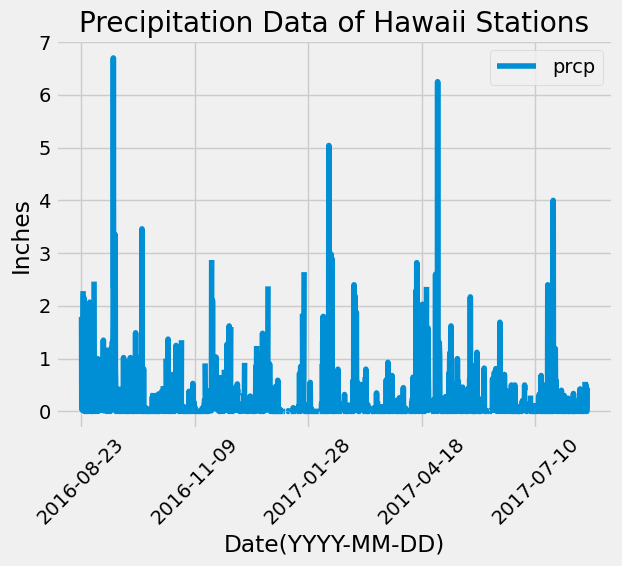

In [15]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.
# 2016-08-23

# Perform a query to retrieve the data and precipitation scores
query = """SELECT
                station,
                prcp,
                date
            FROM
                measurement
            WHERE
                date >= '2016-08-23';
"""
# Save the query results as a Pandas DataFrame. Explicitly set the column names
df = pd.read_sql(text(query), con=engine)

# Sort the dataframe by date
df = df.sort_values(by="date")

# Use Pandas Plotting with Matplotlib to plot the data
df.plot(kind="line", x="date", y="prcp", title="Precipitation Data of Hawaii Stations", ylabel="Inches", xlabel="Date(YYYY-MM-DD)", rot=45)
plt.show()

In [16]:
# Use Pandas to calculate the summary statistics for the precipitation data
df.prcp.describe()

count    2021.000000
mean        0.177279
std         0.461190
min         0.000000
25%         0.000000
50%         0.020000
75%         0.130000
max         6.700000
Name: prcp, dtype: float64

# Exploratory Station Analysis

In [17]:
# Design a query to calculate the total number of stations in the dataset
query = """SELECT
               COUNT(id)
            FROM
                station;
"""
data = engine.execute(text(query)).all()
data

[(9,)]

In [18]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)

query = """SELECT
              station,
              COUNT(id) as totalRows
            FROM
              measurement
            GROUP BY
              station
            ORDER BY
              totalRows DESC;
"""
# List the stations and their counts in descending order.
data = engine.execute(text(query)).all()
data



[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [19]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
query = """
        SELECT
            MIN(tobs),
            MAX(tobs),
            AVG(tobs)
        FROM
            measurement
        WHERE
            station = 'USC00519281'
"""

data = engine.execute(text(query)).all()
data 

[(54.0, 85.0, 71.66378066378067)]

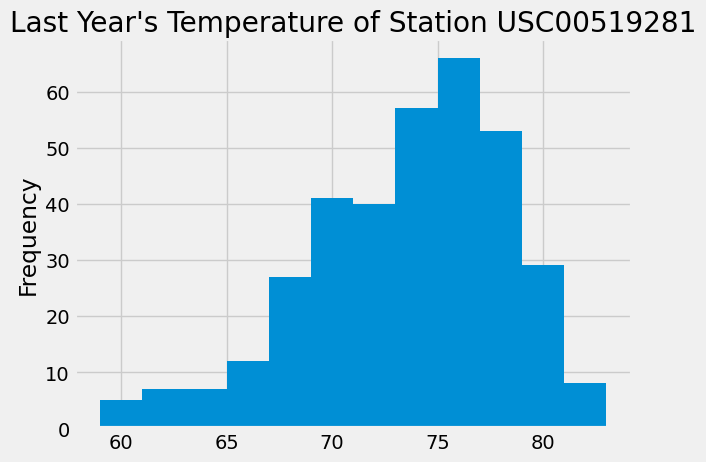

In [20]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
query = """
        SELECT
            station,
            tobs,
            date
        FROM
            measurement
        WHERE
            station = 'USC00519281'
            AND date >= '2016-08-23';
"""

# Save the query results as a Pandas DataFrame. Explicitly set the column names
df3 = pd.read_sql(text(query), con=engine)

# Use Pandas Plotting with Matplotlib to plot the data
df3.tobs.plot.hist(bins=12, title="Last Year's Temperature of Station USC00519281", ylabel="Frequency")
plt.show()

# Close Session

In [21]:
# Close Session
session.close()